# Graduate Admissions

This data set concerns test scores and other admissions variables for a Graduate program and the chance of admission for each student. The first portion of this notebook performs a principal component analysis of the data set in order to reduce its dimensionality. The data set is from [Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read table
admissions = pd.read_csv('admissions_predictions.csv', index_col='Serial No.').rename({'Chance of Admit ' : 'Chance of Admit'}, axis=1)
admissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## Principal Component Analysis
Principal component analysis (PCA) is a tool to help visualize higher-dimensional data in 2 dimensions (e.g. as a scatterplot). It is founded in the linear algebra technique of singular value decomposition. For a detailed explanation of PCA, see the PCA section of my [avocado notebook](../avocado/avocado#principal-component-analysis). To begin performing the PCA, we first make a scree plot to determine if the data can be well represented in 2 dimensions.

In [6]:
# extracting the df as a numpy matrix
admissions_matrix = admissions.values

# normalizing the data within each column
normed_admissions = (admissions_matrix - np.mean(admissions_matrix, axis=0))/ np.sqrt(admissions_matrix.shape[0])

# performing SVD on the matrix
u, sigma, vt = np.linalg.svd(normed_admissions, full_matrices=False)

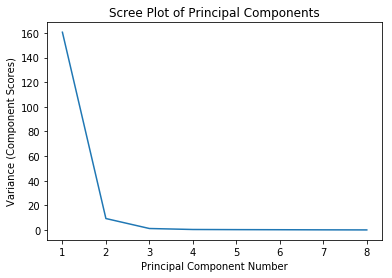

In [19]:
# plotting the scree plot
sns.lineplot(x = range(1, 9), y = sigma**2)
plt.title('Scree Plot of Principal Components')
plt.xlabel('Principal Component Number')
plt.ylabel('Variance (Component Scores)');

Based on how high PC1 and PC2 are relative to the other principal components, the data should be well-represented in 2D. We now use `seaborn` to plot a scatterplot of PC2 vs. PC1.

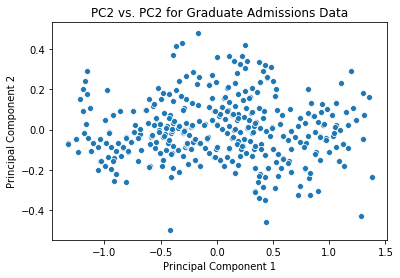

In [21]:
admissions_2d = normed_admissions @ vt.T[:, 0:2]

sns.scatterplot(x = admissions_2d[:,0], y = admissions_2d[:,1])
plt.title("PC2 vs. PC2 for Graduate Admissions Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2");